In [ ]:
#problem 1

'''Comparison between first,second order finite differences and spectral derivative for first derivative of sinx in [0,2*pi]'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fft,ifft

pi=np.pi

#spectral derivative

def spectral(N,u):
  dx=2*pi/N
  X=np.arange(0,N*dx,dx)
  K=fftfreq(N,d=1./N)
  U=[u(x) for x in X]
  Uk=fft(U) # fourier coefficients
  dUk=1j*K*fft(U) #fourier co-efficients of derivative
  Ux=np.real(ifft(dUk)) #inverse fourier to get first derivative
  return Ux

#first order first derivative

def derivative1(N,u):
  dx=2*pi/N
  X=np.arange(0,(N+1)*dx,dx)
  U=[u(x) for x in X]
  dU1=[]
  #genrating the first order first derivatives
  for i in range(N):
    dU=(U[i+1]-U[i])/dx
    dU1.append(dU)
  return dU1

#second order first derivate

def derivative2(N,u):
  dx=2*pi/N
  X=np.arange(-dx,(N+1)*dx,dx)
  U=[u(x) for x in X]
  dU2=[]
  #genrating the second order first derivatives
  for i in range(1,N+1):
    dU=(U[i+1]-U[i-1])/(2*dx)
    dU2.append(dU)
  return dU2

#defining a plot function

def plot(N,u,scheme):
  dx=2*pi/N
  X=np.arange(0,N*dx,dx)
  Y=scheme(N,u)
  plt.plot(X,Y)
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')

#defining the sin function

def sin(x):
  return np.sin(x)

#defining the error plot

def errorplot(N,u,scheme):
  dx=2*pi/N
  X=np.arange(0,N*dx,dx)
  Y=np.cos(X)
  err=Y-scheme(N,u)
  plt.plot(X,err)
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.title('error plot')



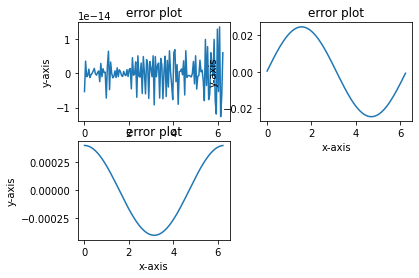

In [ ]:
#error plots for N=128

#plot for spectral derivative

plt.subplot(221)
errorplot(128,sin,spectral)

#plot for first order first derivative

plt.subplot(222)
errorplot(128,sin,derivative1)

#plot for second order first derivative

plt.subplot(223)
errorplot(128,sin,derivative2)


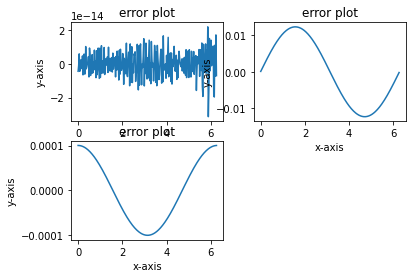

In [ ]:
#error plots for N=256

#plot for spectral derivative

plt.subplot(221)
errorplot(256,sin,spectral)

#plot for first order first derivative

plt.subplot(222)
errorplot(256,sin,derivative1)

#plot for second order first derivative

plt.subplot(223)
errorplot(256,sin,derivative2)

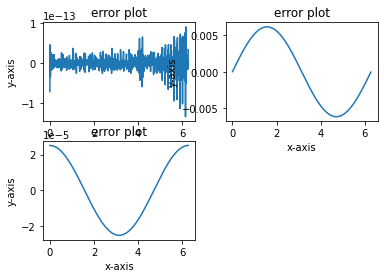

In [ ]:
#error plots for N=512

#plot for spectral derivative

plt.subplot(221)
errorplot(512,sin,spectral)

#plot for first order first derivative

plt.subplot(222)
errorplot(512,sin,derivative1)

#plot for second order first derivative

plt.subplot(223)
errorplot(512,sin,derivative2)

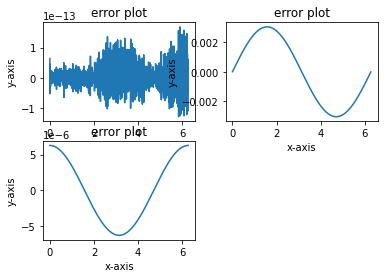

In [ ]:
#error plots for N=1024

#plot for spectral derivative

plt.subplot(221)
errorplot(1024,sin,spectral)

#plot for first order first derivative

plt.subplot(222)
errorplot(1024,sin,derivative1)

#plot for second order first derivative

plt.subplot(223)
errorplot(1024,sin,derivative2)

(0.0, 10.0)

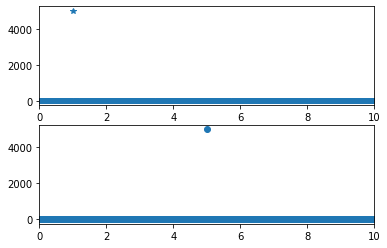

In [ ]:
#problem 2

''' u=sin(w*t).Set dt=0.01 and generate a time series from t=0 to t=100.Perform an fft of the series to show the frequency
spectrum iks composed of a single frequency'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fft,ifft

N=10**4

pi=np.pi

dx=0.01*2*pi

x=np.arange(0,N*dx,dx)



#the wave numbers
k=fftfreq(N,1./N)*(1/100)

#list of frequencies
w=[1,5]

#plotting fft vs wave numbers
u1=np.sin(w[0]*x)
u2=np.sin(w[1]*x)

#fourier transforms
u1k=fft(u1)
u2k=fft(u2)

#plot for frequency 1
plt.subplot(211)
plt.plot(k,abs(u1k),'*')
plt.xlim([0,10])

#plot for frequency 5
plt.subplot(212)
plt.plot(k,abs(u2k),'o')
plt.xlim([0,10])




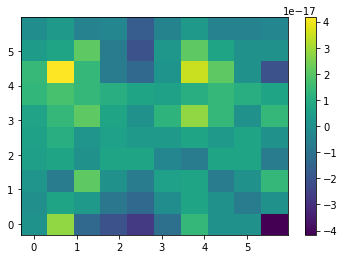

In [ ]:
#problem 3

'''Inverse Laplacian of sin(2*x)*cos(3*y) by spectral methods and comparison with actual solution'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fft,fft2,ifft,ifft2
pi=np.pi
N=10
dx=2*pi/N
k=fftfreq(N,d=1./N)
t=np.arange(0,dx*N,dx)
kx,ky=np.meshgrid(k,k)
x,y=np.meshgrid(t,t)
K=np.sqrt(kx**2+ky**2)
K[0,0]=1
InvLaplacian=-1/K**2
u=np.sin(2*x)*np.cos(3*y)
InvLaplacian_u=np.real(ifft2(InvLaplacian*fft2(u)))
InvLaplacian_u_analytical=(-1/13)*np.sin(2*x)*np.cos(3*y)
error=InvLaplacian_u-InvLaplacian_u_analytical
plt.pcolor(x,y,error)
plt.colorbar()

In [ ]:
'''Euler,Rk-2,Rk-4 methods for du/dt=tu*(1/3)'''

#problem 5 and 6

import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
  return x*y**(1/3)

#error plot

def errplot(dt,scheme,u_0,b): #parameters time-step,scheme(euler/rk-2/rk-4),initial data,right end point of interval
  #actual solution
  def u_act(t):
    return ((t**2)/3+(u_0)**(2/3))**(3/2)
  t=np.arange(0,b+dt,dt)
  actsol=[u_act(j) for j in t]
  schemesol=scheme(dt,u_0,b)
  error=actsol-schemesol
  plt.plot(t,error)

#log-plot

def logerrplot(Dt,scheme,u_0,a,b):#Dt is list of dt's,a is the time point where error will be computed for the three schemes,[0,b] is the time interval
  #actual solution
  def u_act(t):
    return ((t**2)/3+(u_0)**(2/3))**(3/2)
  error=[]
  for dt in Dt:
    z=u_act(a)-scheme(dt,u_0,b)[round(a/dt)]
    error.append(z)
  plt.xscale('log')
  plt.yscale('log')
  plt.plot(Dt,error)

#euler-method

def euler(dt,u_0,b):
  t=np.arange(0,b+dt,dt)
  N=len(t)
  u=np.zeros(N)
  u[0]=u_0
  for i in range(N-1):
    u[i+1]=u[i]+dt*f(t[i],u[i])
  return u

#RK-2

def rk_2(dt,u_0,b):
  t=np.arange(0,b+dt,dt)
  N=len(t)
  u=np.zeros(N)
  u[0]=u_0
  for i in range(N-1):
    k_1=dt*f(t[i],u[i])
    k_2=dt*f(t[i]+dt/2,u[i]+k_1/2)
    u[i+1]=u[i]+k_2
  return u

#RK-4

def rk_4(dt,u_0,b):
  t=np.arange(0,b+dt,dt)
  N=len(t)
  u=np.zeros(N)
  u[0]=u_0
  for i in range(N-1):
    k_1=f(t[i],u[i])
    k_2=f(t[i]+(dt/2),u[i]+dt*(k_1/2))
    k_3=f(t[i]+(dt/2),u[i]+dt*(k_2/2))
    k_4=f(t[i]+dt,u[i]+dt*k_3)
    u[i+1]=u[i]+(1/6)*dt*(k_1+2*k_2+2*k_3+k_4)
  return u


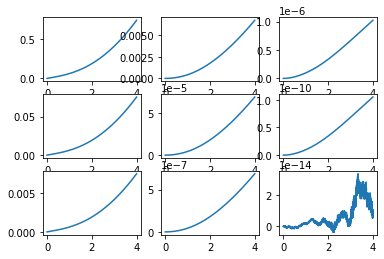

In [ ]:
#initial condition

u_0=1
b=4

#error plot for time-step 0.1(row-1)

plt.subplot(331)
errplot(0.1,euler,u_0,b)
plt.subplot(332)
errplot(0.1,rk_2,u_0,b)
plt.subplot(333)
errplot(0.1,rk_4,u_0,b)

#error plot for timestep 0.01(row-2)

plt.subplot(334)
errplot(0.01,euler,u_0,b)
plt.subplot(335)
errplot(0.01,rk_2,u_0,b)
plt.subplot(336)
errplot(0.01,rk_4,u_0,b)

#error plot for time step 0.001(row-3)

plt.subplot(337)
errplot(0.001,euler,u_0,b)
plt.subplot(338)
errplot(0.001,rk_2,u_0,b)
plt.subplot(339)
errplot(0.001,rk_4,u_0,b)


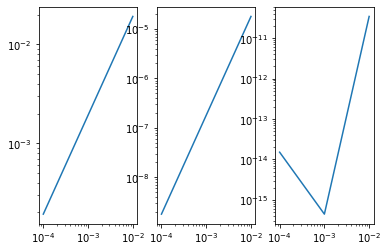

In [ ]:
#parameters

Dt=[0.01,0.001,0.0001]
u_0=1
a=2
b=4

#log plots for the schemes

plt.subplot(131)
logerrplot(Dt,euler,u_0,a,b)
plt.subplot(132)
logerrplot(Dt,rk_2,u_0,a,b)
plt.subplot(133)
logerrplot(Dt,rk_4,u_0,a,b)



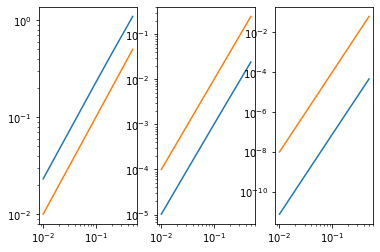

In [ ]:
#parameters

Dt=np.array([0.5,0.2,0.1,0.02,0.01])
u_0=5
a=2
b=4

#log plots for the schemes

plt.subplot(131)
logerrplot(Dt,euler,u_0,a,b)
plt.xscale('log')
plt.yscale('log')
plt.plot(Dt,Dt)

plt.subplot(132)
logerrplot(Dt,rk_2,u_0,a,b)
plt.xscale('log')
plt.yscale('log')
plt.plot(Dt,Dt**2)

plt.subplot(133)
logerrplot(Dt,rk_4,u_0,a,b)
plt.xscale('log')
plt.yscale('log')
plt.plot(Dt,Dt**4)


